<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

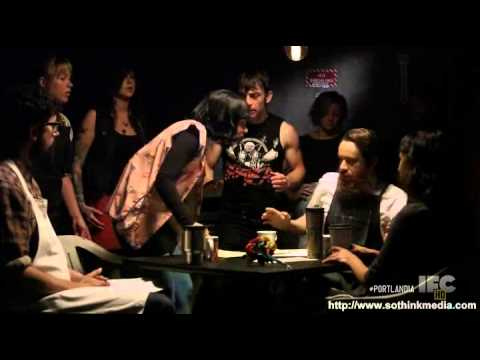

In [77]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [78]:
%pwd

'/Users/jorge/Unit 4 DS 10/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [79]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [30]:
shops.shape

(7616, 3)

In [31]:
# lets check tail data:
shops.tail()

,coffee_shop_name,full_review_text,star_rating
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating
7615,The Steeping Room,5/23/2015 I finally stopped in for lunch with...,4.0 star rating


In [32]:
# checking for duplicates in full_review_text:
shops.describe(exclude='number')

,coffee_shop_name,full_review_text,star_rating
count,7616,7616,7616
unique,79,6915,5
top,Epoch Coffee,10/28/2016 AMAZING atmosphere! I walked aroun...,5.0 star rating
freq,400,4,3780


In [33]:
# lets find out how to get int value for star_rating
int(shops['star_rating'][0].strip().split('.')[0])

5

In [34]:
# lets apply our column with a lambda function:
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x.strip().split('.')[0]))
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [35]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating          int64
dtype: object

In [36]:
shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [37]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.strip())

In [38]:
shops['full_review_text'][0]

'11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?'

In [39]:
# Lets add our dates in their own column:
shops['review_date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atmo...,5,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambian...",4,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots I...,4,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice s...,2,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within t...,4,12/3/2016


In [40]:
# now lets remove our dates from our full_review_text:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: ' '.join(x.split()[1:]))
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016


In [41]:
# were creating a num_check_in feature
# can be either "check-in" or "check-ins"
shops['num_check_in'] = shops['full_review_text'].apply(lambda x: x.split()[0] 
                                                        if x.split()[1]=='check-in' 
                                                        or x.split()[1]=='check-ins'
                                                        else 0)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,1


In [42]:
# and remove the check-in from full_review_text
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: ' '.join(x.split()[2:]) 
                                                        if x.split()[1]=='check-in'
                                                        or x.split()[1]=='check-ins'
                                                        else x)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5,11/25/2016,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4,11/30/2016,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,0
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4,12/3/2016,1


In [43]:
# and remove the check-in from full_review_text
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: ' '.join(x.split()[2:]) 
                                                        if x.split()[1]=='check-in'
                                                        or x.split()[1]=='check-ins'
                                                        else x)
shops.head()



,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5,11/25/2016,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4,11/30/2016,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,0
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4,12/3/2016,1


In [44]:
# make reviews lowercase so Spacy can detect stop words
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [74]:
"""
Import Statements
"""

# Base
from collections import Counter
import re

import pandas as pd
# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    

In [75]:
# How can we count the raw text?
shops['full_review_text'].value_counts(normalize=True)[:50]

the factory cafe is overall such a beautiful and really cool place to just hang out with friends or work on homework. you'll probably see the people around you taking the time to perfect their aesthetic instagram pictures and snapchat stories (myself included). although the cafe itself doesn't provide wifi, it's within range of other places with wifi so that shouldn't deter you from going! this place looks like it literally came straight off of pinterest! so cute!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [45]:
nlp = spacy.load('en_core_web_lg')

In [48]:
#Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [50]:
#Tokenizer Pipe

tokens = []

# Make the tokens
for doc in nlp.pipe(shops['full_review_text'], disable=['tagger', 'parser', 'ner']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop==False) & (token.is_punct==False):
           doc_tokens.append(token.text)
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [51]:
shops['tokens'].head()

0    [love, love, loved, atmosphere, corner, coffee...
1    [listed, date, night, austin, ambiance, austin...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor, good, drinks, nice, seating, ove...
4    [located, northcross, mall, shopping, center, ...
Name: tokens, dtype: object

In [66]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('coffee', 10539),
 ('place', 5444),
 ('good', 3986),
 ('great', 3932),
 ('like', 3125),
 ('austin', 2341),
 ('love', 1942),
 ('time', 1905),
 ('food', 1868),
 ('nice', 1750)]

In [52]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [53]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,coffee,4911,10539,1.0,0.029675,0.029675,0.644827
102,place,3665,5444,2.0,0.015329,0.045004,0.481224
158,good,2792,3986,3.0,0.011223,0.056227,0.366597
68,great,2843,3932,4.0,0.011071,0.067298,0.373293
161,like,2142,3125,5.0,0.008799,0.076097,0.281250


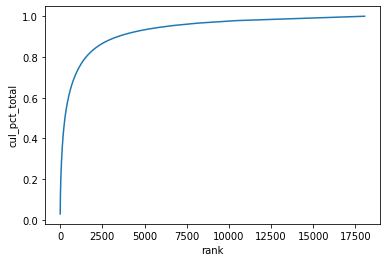

In [54]:
# cumulative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [90]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
18024,frying,1,1,18028.0,0.000003,0.999947,0.000131
18023,mellowing,1,1,18029.0,0.000003,0.999949,0.000131
18025,greys,1,1,18030.0,0.000003,0.999952,0.000131
18028,shelby,1,1,18031.0,0.000003,0.999955,0.000131
18029,foodwise,1,1,18032.0,0.000003,0.999958,0.000131
18033,foodgasm,1,1,18033.0,0.000003,0.999961,0.000131
18032,lentil,1,1,18034.0,0.000003,0.999963,0.000131
18031,mum,1,1,18035.0,0.000003,0.999966,0.000131
18030,4people,1,1,18036.0,0.000003,0.999969,0.000131
18034,uneventful,1,1,18037.0,0.000003,0.999972,0.000131


In [91]:
wc['appears_in_pct'].describe()

count    18047.000000
mean         0.002226
std          0.011754
min          0.000131
25%          0.000131
50%          0.000263
75%          0.000788
max          0.644827
Name: appears_in_pct, dtype: float64

In [62]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.1454737434886668

/Users/jorge/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-ekY37MLJ/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


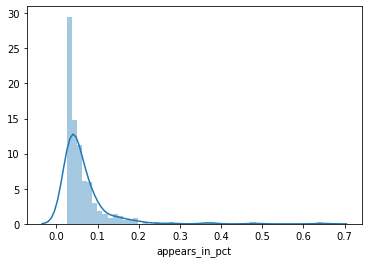

In [94]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

/Users/jorge/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-ekY37MLJ/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


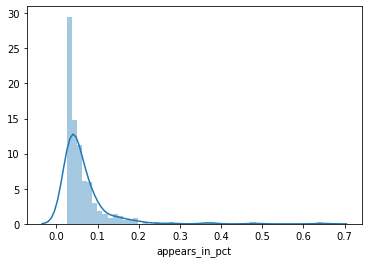

In [95]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

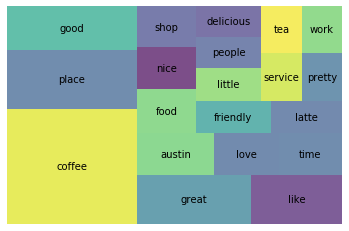

In [55]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7)
plt.axis('off')
plt.show()

In [97]:
# define a function that gets lemmas
# Wrap it all in a function
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text.lower())
    
    # Something goes here:P
    for token in doc:
        if (token.is_stop == False and token.is_punct == False) and token.pos_ != "-PRON-":
            lemmas.append(token.lemma_)
    return lemmas

In [98]:
shops['lemma'] = shops['full_review_text'].apply(lambda row: 
                                                 [x.lemma_ for x in nlp(row.lower()) 
                                                  if (x.is_stop == False 
                                                      and x.is_punct == False) 
                                                  and x.pos_ != "-PRON-"        
                                                 ])



In [100]:
shops['lemmas'].head()

KeyError: 'lemmas'

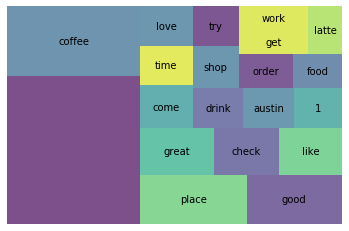

In [101]:
lem_wc = count(shops['lemma'])
lem_wc_top20 = lem_wc[lem_wc['rank'] <= 20]

squarify.plot(sizes=lem_wc_top20['pct_total'], label=lem_wc_top20['word'], alpha=.7)
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [60]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in,tokens,lemma
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5,11/25/2016,1,"[love, love, loved, atmosphere, corner, coffee...","[love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4,12/2/2016,0,"[listed, date, night, austin, ambiance, austin...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4,11/30/2016,1,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating howe...,2,11/25/2016,0,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4,12/3/2016,1,"[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shopping, center, f..."


In [102]:
top_wc = count(shops[shops['star_rating']==5]['lemma'])
bottom_wc = count(shops[shops['star_rating']==1]['lemma'])

In [103]:
top_wc_20 = top_wc[top_wc['rank'] <= 20]
bottom_wc_20 = bottom_wc[bottom_wc['rank'] <= 20]

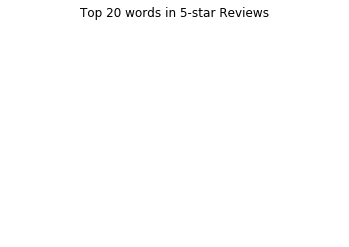

In [104]:
# This is not printing out my chart...
squarify.plot(sizes=top_wc_20['pct_total'], label=top_wc_20['word'], alpha=.7)
plt.title('Top 20 words in 5-star Reviews')
plt.axis('off')
plt.show()

In [89]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

